In [1]:
# import the library
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#libraries for model evaluation
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the dataset
df = pd.read_csv('heart.csv')

In [3]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df.dtypes # check the datatypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
df.info() # concise summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.nunique() # Count number of distinct elements in each column

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [7]:
# get number of unique elements
for n,col in zip(df.nunique(),df.nunique().index):
    print(f"{col} has {n} unique value")

Age has 50 unique value
Sex has 2 unique value
ChestPainType has 4 unique value
RestingBP has 67 unique value
Cholesterol has 222 unique value
FastingBS has 2 unique value
RestingECG has 3 unique value
MaxHR has 119 unique value
ExerciseAngina has 2 unique value
Oldpeak has 53 unique value
ST_Slope has 3 unique value
HeartDisease has 2 unique value


In [8]:
df.shape # check shape

(918, 12)

In [9]:
df.isna().sum() # check for NaN values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
# get categorical columns
categorical_cols= df.select_dtypes(include=['object'])

In [12]:
# get count of unique values for categorical columns
for cols in categorical_cols.columns:
    print(cols,':', len(categorical_cols[cols].unique()),'labels')

Sex : 2 labels
ChestPainType : 4 labels
RestingECG : 3 labels
ExerciseAngina : 2 labels
ST_Slope : 3 labels


In [13]:
# categorical columns
cat_col = categorical_cols.columns

In [14]:
# numerical column
num_col = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']

In [15]:
# define X and y
X = df.drop(['HeartDisease'],axis=1)
y = df['HeartDisease']

In [16]:
# create a pipeline for preprocessing the dataset

num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=5)),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = num_col 
cat_attribs = cat_col

# apply transformation to the numerical and categorical columns
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [17]:
X = full_pipeline.fit_transform(X)

In [18]:
# save preprocessed data
temp_df = pd.DataFrame(X)
temp_df.to_csv('processed_data.csv')

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

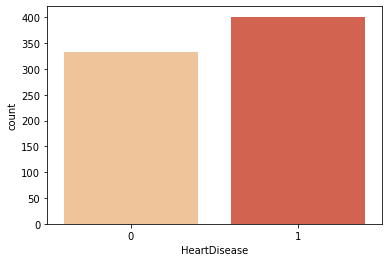

In [20]:
# count plot for number of heart disease(1)/No heart disease(0)
import seaborn as sns
sns.countplot(y_train,palette='OrRd')

# Logistic regression

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        84
           1       0.84      0.90      0.87       100

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



confusion matrix for logistic regression


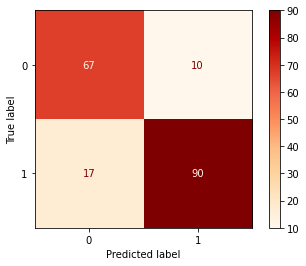

In [21]:
# Build logistic regression model
lr = LogisticRegression()

# fit the model on training data
lr.fit(X_train, y_train)

# predict on test data
lrpred = lr.predict(X_test)

# classification report
print(classification_report(lrpred,y_test))
print("\n")

# plot confusion matrix
print("confusion matrix for logistic regression")
displr = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.OrRd , values_format='d')

# Random Forest

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        84
           1       0.86      0.92      0.89       100

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



confusion matrix for random forest classifier


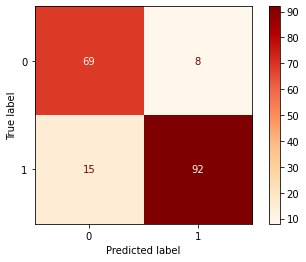

In [22]:
# Build random forest classifier model
rf=RandomForestClassifier()

# fit the model on trainign data
rf.fit(X_train, y_train)

# predict on test data
rfpred = rf.predict(X_test)

print(classification_report(rfpred,y_test))
print("\n")
print("confusion matrix for random forest classifier")
displr = plot_confusion_matrix(rf, X_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

# GradientBoostingClassifier



classification report for gradient boosting classifier
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        81
           1       0.88      0.91      0.90       103

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



confusion matrix for gradient boosting classifier


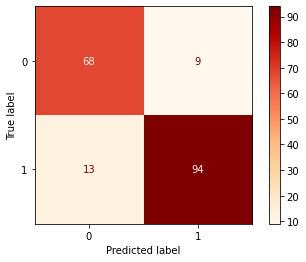

In [23]:
# Build gradient boost classifier 
gbm=GradientBoostingClassifier()

# fit the model on training data
gbm.fit(X_train, y_train)

# predict on test data
gbmpred = gbm.predict(X_test)

print("\n")
print("classification report for gradient boosting classifier")
print(classification_report(gbmpred,y_test))
print("\n")
print("confusion matrix for gradient boosting classifier")
displr = plot_confusion_matrix(gbm, X_test, y_test ,cmap=plt.cm.OrRd , values_format='d')

# Performance Tuning

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [25]:
# param_grid = { 
#     'n_estimators': [50,100,200, 300,400, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [26]:
# CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5,n_jobs=-1,verbose=3)
# CV_rfc.fit(X_train, y_train)

In [27]:
# CV_rfc.best_params_

# tuned parameters obtained are:

# {'criterion': 'entropy',
#  'max_depth': 8,
#  'max_features': 'auto',
#  'n_estimators': 50}

In [28]:
# create a fresh model based on tuned parameters
rfc1=RandomForestClassifier(random_state=42, max_features='sqrt', n_estimators= 50, max_depth=7, criterion='gini')

In [29]:
rfc1.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rfc1.predict(X_test)
print('Random forest accuracy_score:',accuracy_score(y_test,y_pred))

Random forest accuracy_score: 0.8804347826086957


# Save the Model

In [30]:
import pickle

# save the random forest model for future use
pickle.dump(rfc1, open('rfc.pickle', 'wb'))

# save the preprocessing pipeline
pickle.dump(full_pipeline, open('full_pipeline.pickle', 'wb'))

# Load the Models for future use

In [31]:
rfc_saved = pickle.load(open('rfc.pickle','rb'))
full_pipeline_saved = pickle.load(open('full_pipeline.pickle','rb'))

# Visualization

In [32]:
target = df['HeartDisease'].replace([0,1],['Low','High'])

In [33]:
data = pd.crosstab(index=df['Sex'],
           columns=target)

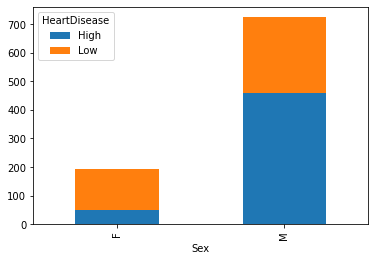

In [34]:
data.plot(kind='bar',stacked=True)
plt.show()

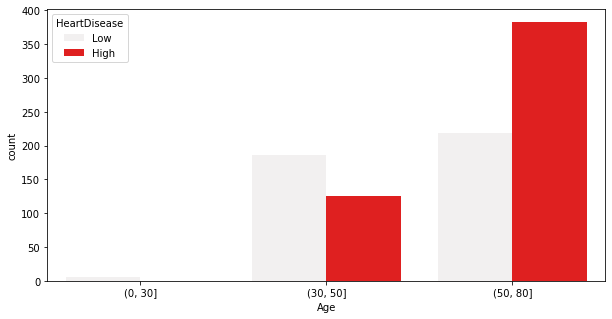

In [35]:
plt.figure(figsize=(10,5))
bins=[0,30,50,80]
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=target,color='r')
plt.show()

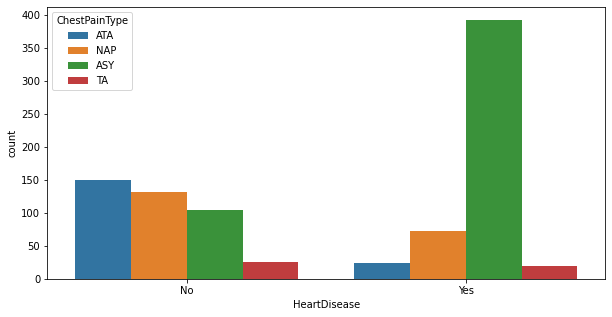

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x=target,hue=df.ChestPainType)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

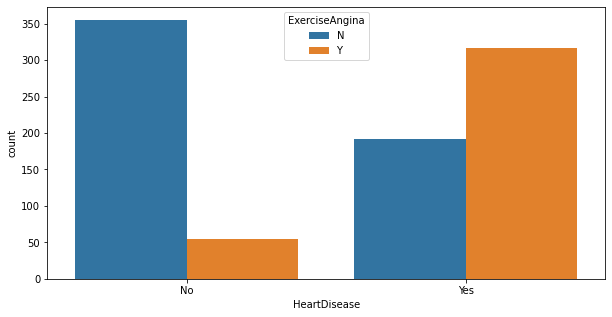

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x=target,hue=df.ExerciseAngina)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

# feature importance

In [38]:
# get important features used by model 
importances = rfc1.feature_importances_
feature_names = num_col
for i in cat_col:
    feature_names = feature_names + [i]*df[i].nunique()

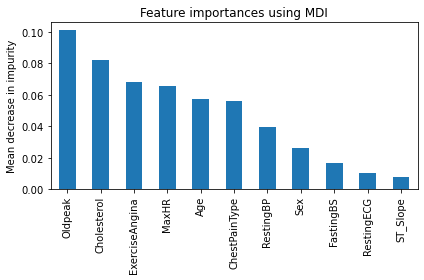

In [39]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

forest_importances = forest_importances.groupby(level=0).first().sort_values(ascending=False)

# plot the features based on their importance in model performance.
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()